# Проект принятие решений в бизнесе

## Вступление
**Цель проекта:** проанализировать список гипотез и проанализировать результаты A/B теста

В нашем распоряжении есть 3 датасета:
- датасет с гипотезами
- датасет с заказами
- датасет с посетителями

Разделим работу по проекту на следующие этапы:
- Вступление
- Приоритезация гипотез
    - Применим фреймворк ICE для приоритезации гипотез
    - Применим фреймворк RICE для приоритезации гипотез
    - Оценим, как изменилась приоритезация гипотез при изменении фреймворка ICE на RICE
- Анализ А/В теста
- Выводы


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Приоритезация гипотез

### Применим фреймворк ICE для приоритезации гипотез

In [2]:
#прочитаем файл с гипотезами
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
#выведем информацию о датасете
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 9 entries, 0 to 8
,Data columns (total 5 columns):
, #   Column      Non-Null Count  Dtype 
,---  ------      --------------  ----- 
, 0   Hypothesis  9 non-null      object
, 1   Reach       9 non-null      int64 
, 2   Impact      9 non-null      int64 
, 3   Confidence  9 non-null      int64 
, 4   Efforts     9 non-null      int64 
,dtypes: int64(4), object(1)
,memory usage: 488.0+ bytes


В датасете представлено 9 гипотез, нулевых значений нет.

In [4]:
#приведем названия столбцов к "змеинному стилю"
hypothesis = hypothesis.rename(columns={'Hypothesis': 'hypothesis', 'Reach':'reach', 'Impact':'impact', 
                                        'Confidence':'confidence', 'Efforts':'efforts'})
hypothesis.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [5]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis.sort_values(by='ice', ascending=False).head())

#выведем полные названия первых 3-х гипотез
list(hypothesis.sort_values(by='ice', ascending=False)['hypothesis'].head(3))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000


['Запустить акцию, дающую скидку на товар в день рождения',
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок']

Самыми приоритетными гипотезами явлется гипотезы с индексами:
- 8 (Запустить акцию, дающую скидку на товар в день рождения), 
- 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)
- 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок).

### Применим фреймворк RICE для приоритезации гипотез

In [6]:
pd.set_option('display.max_colwidth', None)
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis.sort_values(by='rice', ascending=False).head())

pd.reset_option('display.max_colwidth')

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


Самыми приоритетными гипотезами явлется гипотезы с индексами:
- 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), 
- 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа)
- 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей).

### Оценим, как изменилась приоритезация гипотез при изменении фреймворка ICE на RICE

При изменении приоритезации гипотез с ICE на RICE изменился порядок наиболее приоритетных гипотез. В ТОП-3 ICE входят гипотезы 8, 7, 0, а в ТОП-3 RICE входят гипотезы 7, 2, 0. Различие связано с добавлением критерия Reach, обозначающий количество пользователей, которых заденет планируемое изменение. Критерий Reach для гипотез 7 и 2 оказался выше, чем у гипотез 8, 0 и 6, поэтому они поднялись в списке выше по итоговому значению RICE

## Анализ А/В теста

### Построим график кумулятивной выручки по группам

Соберем кумулятивные данные

In [7]:
#прочитаем файл с заказами
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
#выведем информацию о датасете
orders.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 1197 entries, 0 to 1196
,Data columns (total 5 columns):
, #   Column         Non-Null Count  Dtype 
,---  ------         --------------  ----- 
, 0   transactionId  1197 non-null   int64 
, 1   visitorId      1197 non-null   int64 
, 2   date           1197 non-null   object
, 3   revenue        1197 non-null   int64 
, 4   group          1197 non-null   object
,dtypes: int64(3), object(2)
,memory usage: 46.9+ KB


В датасете представлены 1197 уникальных транзакций. Нулевых значений нет. В столбце 'date' поменяем тип данных на datetime 

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
#проверим изменение типа данных в столбце date
orders.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 1197 entries, 0 to 1196
,Data columns (total 5 columns):
, #   Column         Non-Null Count  Dtype         
,---  ------         --------------  -----         
, 0   transactionId  1197 non-null   int64         
, 1   visitorId      1197 non-null   int64         
, 2   date           1197 non-null   datetime64[ns]
, 3   revenue        1197 non-null   int64         
, 4   group          1197 non-null   object        
,dtypes: datetime64[ns](1), int64(3), object(1)
,memory usage: 46.9+ KB


In [10]:
#прочитаем файл с посетителями
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
#выведем информацию о датасете
visitors.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 62 entries, 0 to 61
,Data columns (total 3 columns):
, #   Column    Non-Null Count  Dtype 
,---  ------    --------------  ----- 
, 0   date      62 non-null     object
, 1   group     62 non-null     object
, 2   visitors  62 non-null     int64 
,dtypes: int64(1), object(2)
,memory usage: 1.6+ KB


В датасете представлены 62 записи о посетителях. Нулевых значений нет. В столбце 'date' поменяем тип данных на datetime 

In [12]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

#проверим изменение типа данных в столбце date
visitors.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 62 entries, 0 to 61
,Data columns (total 3 columns):
, #   Column    Non-Null Count  Dtype         
,---  ------    --------------  -----         
, 0   date      62 non-null     datetime64[ns]
, 1   group     62 non-null     object        
, 2   visitors  62 non-null     int64         
,dtypes: datetime64[ns](1), int64(1), object(1)
,memory usage: 1.6+ KB


In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

#выведем результат с кумулятивными данными
print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
,0 2019-08-01     A      24      20   148579       719
,1 2019-08-01     B      21      20   101217       713
,2 2019-08-02     A      44      38   242401      1338
,3 2019-08-02     B      45      43   266748      1294
,4 2019-08-03     A      68      62   354874      1845


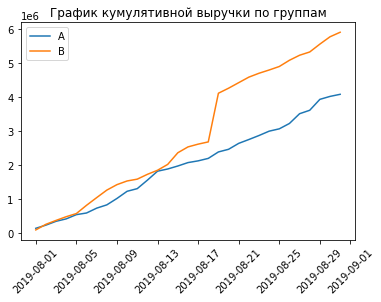

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=45)
plt.legend();

Вначале выручка группы В стала больше выручки группы А, но к 13.08.2019 показатели сравнялись. Далее кумулятивная выручка группы В резко взрастает в районе 18.08.2019, скорее всего это связано с крупными заказами, т.е. аномалиями (выбросами). В будущем анализе исключим их.  

### Построим график кумулятивного среднего чека по группам

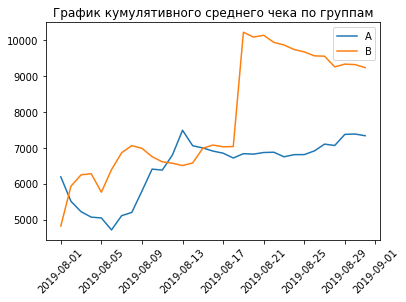

In [15]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=45)
plt.legend();

Средний чек группы А имеет сильный рост в районе 18.08.2019, скорее всего это так же связано с крупными заказами.

### Построим график относительного изменения кумулятивного среднего чека по группам

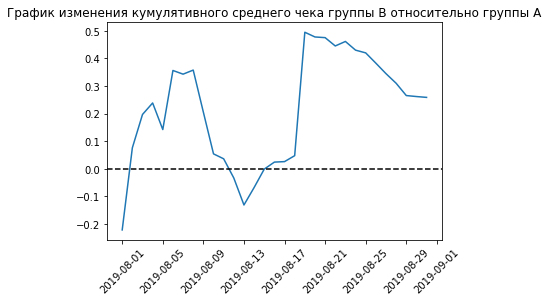

In [16]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График изменения кумулятивного среднего чека группы В относительно группы А')
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');


Наибольшуя часть времени график находится выше 0, что свидетельствует о том, что кумулятивный средний чек группы В выше, чем у группы А. Последнее значение относительного изменения кумулятивного среднего чека находится в районе 0.27, т.е. 27%. На пике значение достигало 0,5, т.е. 50%.
График изменения сильно "скачет" в районе 2019-08-08 и 2019-08-17, что свидетельствует о наличии выбросов.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

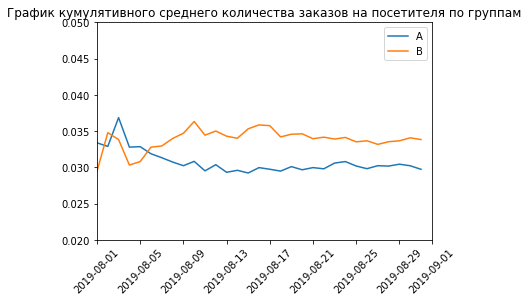

In [17]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=45)
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.05]);

Среднее кол-во заказов на посетителя в группах стабилизировался возле одного значения. Показатель у группы В оказался выше, чем у группы А.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя по группам

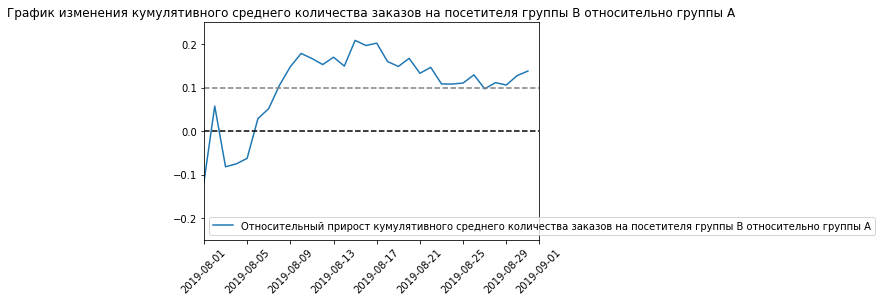

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.title('График изменения кумулятивного среднего количества заказов на посетителя группы В относительно группы А')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.25, 0.25]);

В начале теста группа В произрывала группе А, но потом вырвалась вперед.

### Построим точечный график количества заказов по пользователям

In [19]:
#выведем данные о кол-во заказов для каждого пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
,1023  4256040402      11
,591   2458001652      11
,569   2378935119       9
,487   2038680547       8
,44     199603092       5
,744   3062433592       5
,55     237748145       5
,917   3803269165       5
,299   1230306981       5
,897   3717692402       5


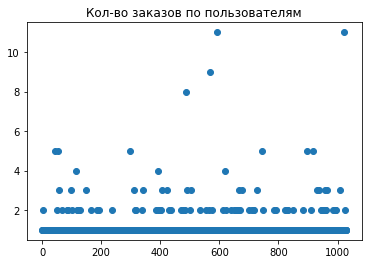

In [20]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Кол-во заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']) ;

Много пользователей с заказами от 1-го до 2-х. Их точная доля не ясна

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [21]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 2. 4.]


In [22]:
abnormal_order_limit = np.percentile(ordersByUsers['orders'], 95)
abnormal_order_limit

2.0

Не более 5% пользователей оформили не менее 3-х заказов. Не более 1% пользователей оформили 4 заказа и более заказа. Для границы отсчета аномалий примем пользователей сделавших 3 заказа и более.

### Построим точечный график стоимостей заказов

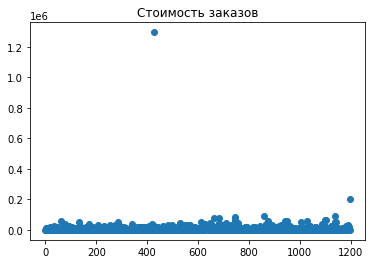

In [23]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Стоимость заказов')
plt.scatter(x_values, orders['revenue']);


Во время проведения теста был один крупный заказ более чем на 1,2 млн и еще один крупный заказ на 200 тыс. Увеличим масштаб, чтобы лучше оценить стоимость основной ммассы заказов.

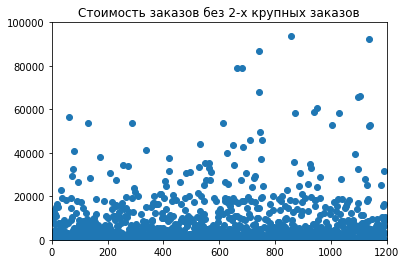

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Стоимость заказов без 2-х крупных заказов')
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1200, 0, 100000]);

Помимо описанных выше 2-х крупных заказов присутствуют и другие аномальные заказы. Граница аномальных заказов наблюдается в районе от 20 тыс до 40 тыс.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [25]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Не более 5% заказов были по стоимости выше 28000. Не более 1% заказов были по стоимост выше 58000. В качестве границы для определения аномальных заказов примем 28000 руб.

In [26]:
abnormal_revenue_limit = np.percentile(orders['revenue'], 95)
abnormal_revenue_limit



28000.000000000004

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы. -
- Нулевая: различий в среднем количестве заказов между группами нет. 
- Альтернативная: различия в среднем между группами есть.

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
,0.138


По "сырым" данным есть различие в среднем числе заказов между группами А и В, т.к. p-value = 0.017 меньше 0,5. Нулевую гипотезу отвергаем. Относительный выигрыш группы В составляет около 13,8%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. 
- Нулевая гипотеза: различий в среднем чеке между группами нет. 
- Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [29]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
,0.259


P-value равен 0.729 и больше 0.05. Нет оснований отвергать нулевую гипотезу и считать, что в среднем чеке есть различия. При этом средний чек группы В значительно выше среднего чека группы А примерно на 26%

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

За аномальных пользователей примем тех, кто совершил более 2-х заказов (т.е. 3 и более) или тех, кто совершил заказ на сумму больше 28000 руб.

In [30]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > abnormal_order_limit]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > abnormal_order_limit]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > abnormal_revenue_limit]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
,18      199603092
,928     204675465
,23      237748145
,37      249864742
,dtype: int64
,74


74 аномальных пользователя.

In [31]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
,0.173


Аномальные пользователи не повлияли на среднее количество заказов на пользователя.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [32]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
,-0.020


P-value увеличился, но и разница между сегментами сократилась с 28% до -2%.

### Примим решение по результатам теста

Соберем имеющиеся факты:
- Есть статистически значимое различие по среднему количеству заказов между группами как по "сырым" данным, так и после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов можду группами сообщает, что результат группы В лучше группы А и нет тенденции к ухудшению
- График различия среднего чека говорит о том, что результаты группы B почти на 25%

Исходя из указанных выше фактов принимаем решение остановить тест, признать его успешным и победу группы В.

## Вывод

В результате исследования гипотез было выявлено, что параметр Reach связанный с кол-вом пользователей, на которых гипотетически повлияет изменение, во фреймворке RICE влияет на приоритезацию гипотез по сравнению с фреймворка ICE.

Наиболее приоритетные гипотезы по фреймворку RICE:
- 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), 
- 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа)
- 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей).

В результате анализа А/В теста было принято решение об остановке теста и признания его успешным, исходя из следующих фактов:
- Есть статистически значимое различие по среднему количеству заказов между группами как по "сырым" данным, так и после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия среднего количества заказов можду группами сообщает, что результат группы В лучше группы А и нет тенденции к ухудшению
- График различия среднего чека говорит о том, что результаты группы B почти на 25%